In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.image import imread

from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore')

In [2]:
b_d=os.listdir('WaferMap/balanced')
for i in b_d:
   print( i,len(os.listdir('WaferMap/balanced/'+i)))

Center 409
Donut 409
Edge-loc 409
Edge-ring 409
Loc 409
Near-Full 409
None 409
Random 409
Scratch 409


In [3]:
b_path='WaferMap/balanced/'
sample_wafer=[]
for i in b_d:
    sample_wafer.append(b_path+i+'/'+os.listdir(b_path+i+'/')[0])
sample_wafer

['WaferMap/balanced/Center/center_1.jpg',
 'WaferMap/balanced/Donut/Donut_1.jpg',
 'WaferMap/balanced/Edge-loc/Edge-loc_1.jpg',
 'WaferMap/balanced/Edge-ring/Edge-ring_1.jpg',
 'WaferMap/balanced/Loc/Loc_1.jpg',
 'WaferMap/balanced/Near-Full/Near-full_1 - Copy (10) - Copy.jpg',
 'WaferMap/balanced/None/None_1.jpg',
 'WaferMap/balanced/Random/Random_1.jpg',
 'WaferMap/balanced/Scratch/Scratch_1.jpg']

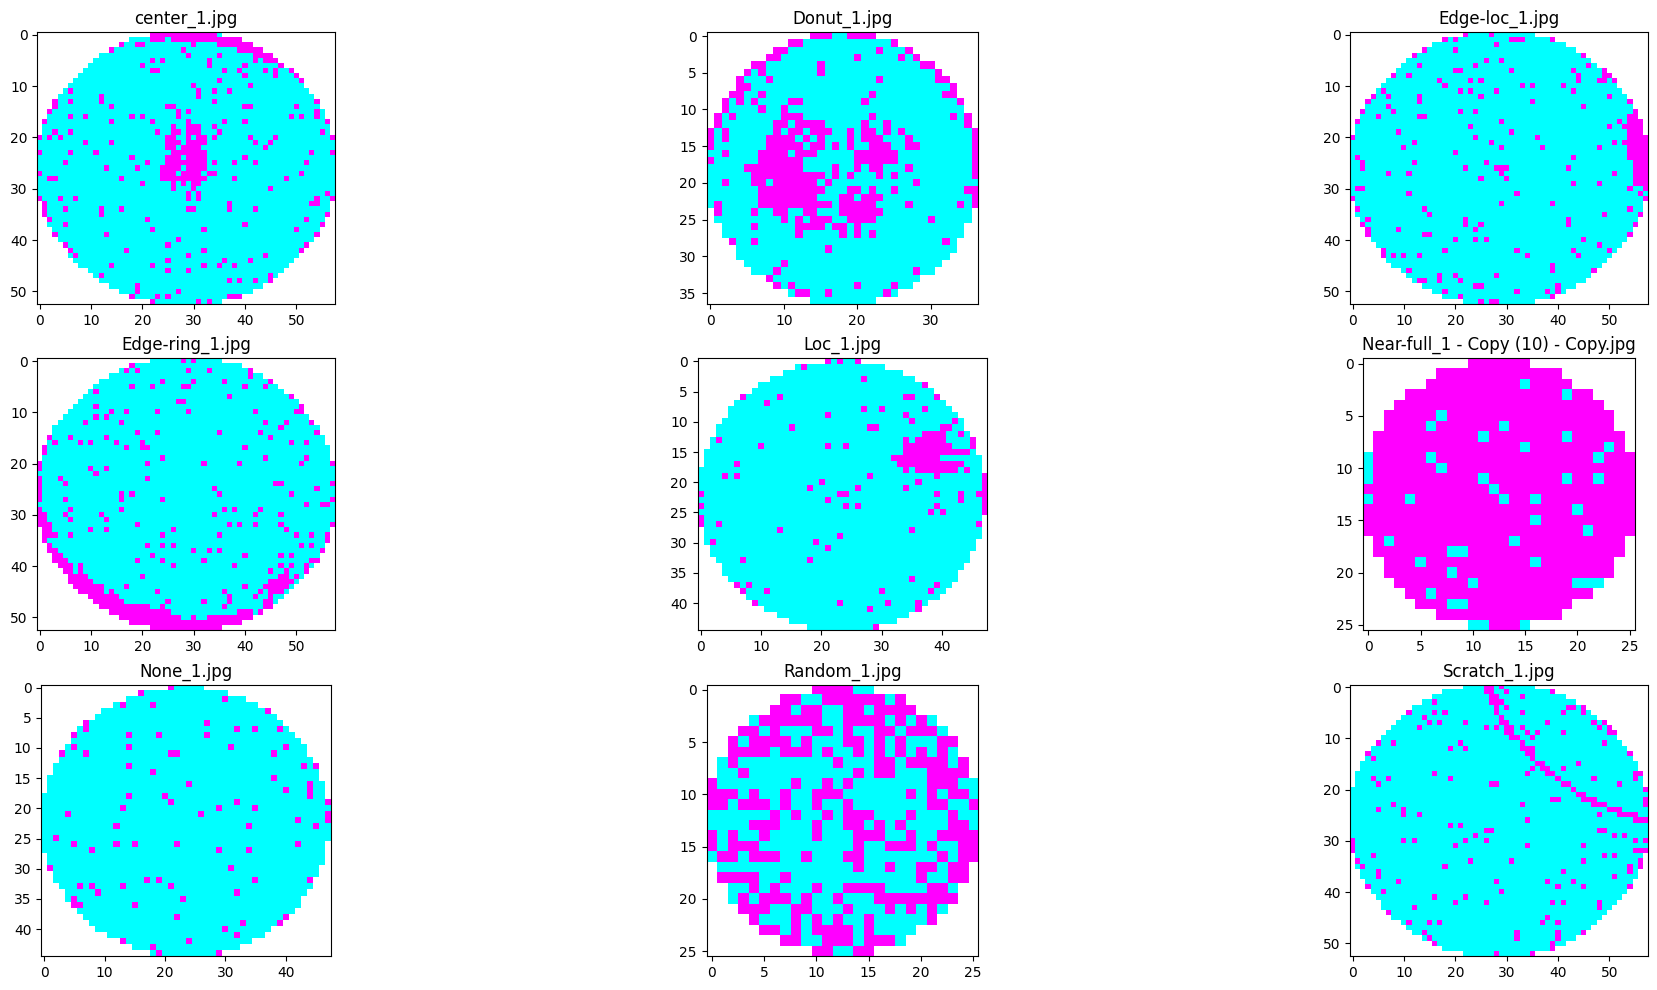

In [4]:
# plot some wafer images
f, axarr = plt.subplots(3,3,figsize=(24,12))
m=0
for i in range(3):
    for j in range(3):
        axarr[i,j].imshow(imread(sample_wafer[m]))
        axarr[i,j].set_title(os.path.basename(sample_wafer[m])) 
        m+=1

In [5]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

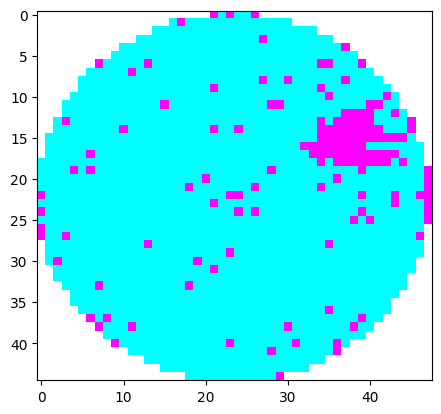

In [6]:
plt.imshow(imread(sample_wafer[4]))

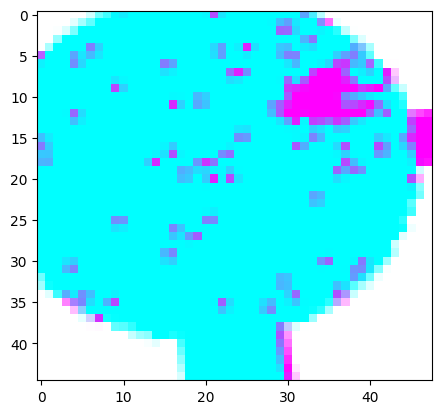

In [7]:
plt.imshow(image_gen.random_transform(imread(sample_wafer[4])))

In [8]:
train_path='WaferMap/balanced'
test_path='WaferMap/test'

In [9]:
batch_size = 16
img_shape=(64,65,4)

In [10]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=img_shape[:2],
                                                color_mode='rgba',
                                               batch_size=batch_size,
                                               class_mode='categorical')

test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=img_shape[:2],
                                                color_mode='rgba',
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                              shuffle=False)

Found 3681 images belonging to 9 classes.
Found 816 images belonging to 9 classes.


In [41]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

# Define the input shape
input_layer = Input(shape=img_shape)

# First set of layers
x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(input_layer)
x = MaxPool2D(pool_size=(2, 2))(x)

# Second set of layers
x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)

# third set of layers
x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)

x = Flatten()(x)

# feature extractor model
feature_extractor = Model(inputs=input_layer, outputs=x)

# Freeze the layers
for layer in feature_extractor.layers:
    layer.trainable = False


feature_extractor.summary()

"""
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))


model.add(Dense(9, activation='softmax'))"""

# Remove the fully connected layers
# feature_extractor = Sequential(model.layers[:-4])


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 64, 65, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 62, 63, 32)     │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 2304)           │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,928 (113.00 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 28,928 (113.00 KB)

"\nmodel.add(Dense(256, activation='relu'))\nmodel.add(Dropout(0.2))\nmodel.add(Dense(128, activation='relu'))\n\n\nmodel.add(Dense(9, activation='softmax'))"

In [42]:
# Extract features for training data
train_features = feature_extractor.predict(train_image_gen)
train_labels = train_image_gen.classes

# Extract features for test data
test_features = feature_extractor.predict(test_image_gen)
test_labels = test_image_gen.classes

231/231 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step


In [44]:
print(train_image_gen.class_indices)
print()
print(test_image_gen.class_indices.keys())
print()
print(train_image_gen.classes)

{'Center': 0, 'Donut': 1, 'Edge-loc': 2, 'Edge-ring': 3, 'Loc': 4, 'Near-Full': 5, 'None': 6, 'Random': 7, 'Scratch': 8}

dict_keys(['Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Loc', 'Near-Full', 'None', 'Random', 'Scratch'])

[0 0 0 ... 8 8 8]


In [45]:
# Train RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(train_features, train_labels)

# Predict on test data
test_predictions = rf_classifier.predict(test_features)

# Evaluate the classifier
print("Accuracy:", accuracy_score(test_labels, test_predictions))

# dict
results = {}
results['RandomForestClassifier'] = accuracy_score(test_labels, test_predictions)

Accuracy: 0.1642156862745098


In [46]:
# Train LogisticRegression
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(train_features, train_labels)

test_predictions = lr_classifier.predict(test_features)

print("Accuracy:", accuracy_score(test_labels, test_predictions))

results['LogisticRegression'] = accuracy_score(test_labels, test_predictions)

Accuracy: 0.15196078431372548


In [48]:
# train SVM
svm_classifier = SVC(random_state=42)
svm_classifier.fit(train_features, train_labels)

test_predictions = svm_classifier.predict(test_features)

print("Accuracy:", accuracy_score(test_labels, test_predictions))

results['SVM'] = accuracy_score(test_labels, test_predictions)

Accuracy: 0.0857843137254902


In [49]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [51]:
# Add fully connected layers to the feature extractor
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
output_layer = Dense(9, activation='softmax')(x)  # Assuming 9 classes

# Create the final model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 64, 65, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 62, 63, 32)     │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 653,065 (2.49 MB)

 Trainable params: 624,137 (2.38 MB)

 Non-trainable params: 28,928 (113.00 KB)

In [52]:
history = model.fit(train_image_gen,
                    epochs=20,
                    validation_data=test_image_gen,
                    callbacks=[early_stop])

Epoch 1/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - accuracy: 0.2588 - loss: 1.9174 - val_accuracy: 0.3431 - val_loss: 1.6394
Epoch 2/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.4154 - loss: 1.4729 - val_accuracy: 0.2745 - val_loss: 1.6206
Epoch 3/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.4748 - loss: 1.3418 - val_accuracy: 0.3762 - val_loss: 1.5003
Epoch 4/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.5170 - loss: 1.2580 - val_accuracy: 0.4571 - val_loss: 1.4238
Epoch 5/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.5591 - loss: 1.1928 - val_accuracy: 0.4571 - val_loss: 1.5148
Epoch 6/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.5878 - loss: 1.0838 - val_accuracy: 0.5245 - val_loss: 1.2679
Epoch 7/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.6421 - loss: 0.9968 - val_accuracy: 0.4583 - val_loss: 1.3023
Epoch 8/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.6313 - loss: 0.9819 - 

In [54]:
loss, accuracy = model.evaluate(test_image_gen)
print(f"Neural Network Accuracy: {accuracy}")

# confusion matrix
predictions = model.predict(test_image_gen)
predictions = np.argmax(predictions, axis=1)
cm = confusion_matrix(test_labels, predictions)

print(classification_report(test_labels, predictions))

# Add the result to the results dictionary
results['NeuralNetwork'] = accuracy

51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.6405 - loss: 0.9926
Neural Network Accuracy: 0.5061274766921997
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step
              precision    recall  f1-score   support

           0       0.48      0.95      0.64       100
           1       0.78      0.71      0.75        70
           2       0.42      0.05      0.09       100
           3       0.67      0.93      0.78       100
           4       0.50      0.17      0.25       100
           5       0.84      1.00      0.92        54
           6       0.02      0.01      0.01       100
           7       0.92      0.87      0.89       101
           8       0.18      0.31      0.23        91

    accuracy                           0.53       816
   macro avg       0.53      0.56      0.51       816
weighted avg       0.51      0.53      0.48       816



In [55]:
# compare the results
results_df = pd.DataFrame(results.items(), columns=['Model', 'Accuracy'])
results_df

,Model,Accuracy
0,RandomForestClassifier,0.164216
1,LogisticRegression,0.151961
2,SVM,0.085784
3,NeuralNetwork,0.506127


In [56]:
# maalesef complete failure :/ we'll try again